# Data Analysis Project Part 1

### By Elijah Ritchie and Noah Choate

## Introduction

Dogs have always been very popular pets because of their intelligence and loyalty, however different breeds tend to have varying personality traits that can make or break the experience. Behavior around strangers is one of the most important factors to consider when choosing a dog and this project aims to figure out which personality traits are most correlated to this. With this problem in mind, we set to identify which traits provide the best experience for a family.

## About the Data
The dataset that will be studied includes ninety-six different dog breeds along with information including physical characteristics, personality traits, and how they behave around strangers, children, and other dogs. Because we are focusing on the personality traits of the different dog breeds, the physical characteristics will not play a role in our study. The variables in the data we will be focusing on are not physical measurements. Rather, they are scores ranging 1-5 based on how each breed normally tends to display the given trait. For example, in the 'playfullness' column, a score of 5 means that the breed is generally extremely playful. We are also given variables called 'good_with_strangers', 'good_with_children', and 'good_with_other_dogs' which are also scored on the 1-5 scale.

## Loading the Libraries and Data
In order to figure out which personality traits correlate most with behavior around strangers, we will be using a random forest, so we will be using packages from numpy and pandas for data organization, sklearn for the actual algorithm, and matplotlib for visualization.

The dataset is a csv from Kaggle, so it can easily be converted to a pandas dataframe. It also seems to be a very clean and organized dataset which is very nice because minimal effort will be required to use it.

In [28]:
#This block imports the packages that will be needed for the random forest and analysis.
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
#Read the csv data file into a pandas dataframe
dog_data = pd.read_csv('dog_breeds.csv')
dog_data.tail()

,Name,min_life_expectancy,max_life_expectancy,max_height_male,max_height_female,max_weight_male,max_weight_female,min_height_male,min_height_female,min_weight_male,...,shedding,grooming,drooling,coat_length,good_with_strangers,playfulness,protectiveness,trainability,energy,barking
92,American Staffordshire Terrier,12,16,19.0,19.0,70.0,55.0,18.0,18.0,55.0,...,2,1,1,1,4,3,5,3,3,3
93,Australian Shepherd,12,15,23.0,23.0,65.0,55.0,20.0,20.0,50.0,...,3,2,1,1,3,4,3,5,5,3
94,Pembroke Welsh Corgi,12,13,12.0,12.0,31.0,28.0,10.0,10.0,24.0,...,4,2,1,1,4,4,5,4,4,4
95,Yorkshire Terrier,11,15,8.0,8.0,7.0,7.0,7.0,7.0,7.0,...,1,5,1,1,5,4,5,4,4,4
96,French Bulldog,10,12,13.0,13.0,28.0,26.0,11.0,11.0,20.0,...,3,1,3,1,5,5,3,4,3,1


## Subsetting and Choosing Features/Target
As mentioned before, we will not be using physical characteristics of different breeds in our algorithm because they are not related to how dogs will act around strangers. The personality traits included in the data are "playfulness", "protectiveness", "trainability", "energy", and "barking". These will be the features that are compared to the target which is called "good_with_strangers". 

In [30]:
#This code subsets the dataframe into 2--One contains independent variables and the other contains the target variable.
dog_independent = ['playfulness', 'protectiveness', 'trainability', 'energy', 'barking']
dog_dependent = ['good_with_strangers']

dog_features = dog_data[dog_independent]
dog_target = np.ravel(dog_data[dog_dependent])

## Creating the Random Forest and Retrieving Feature Importances
Now that we have the features and the target, we can fit them to the random forest algorithm. This can allow us to predict values for the good_with_strangers target variable when given data for the variables in dog_features. However, our goal is only to find out the importances of each of these variables which can easily be extracted with a function which is used in the following code. The variables with high importance values are highly correlated to whether dogs are good with strangers and those with low values do not have much correlation. 

In [31]:
#Fit the data to a random forest object
dog_forest = RandomForestClassifier()
dog_forest.fit(dog_features, dog_target)

RandomForestClassifier()

In [32]:
#Retrieve the importance values for each feature variable
dog_importances = dog_forest.feature_importances_
names = dog_features.columns

#Print the features and their importance values
print(names)
print(dog_importances)

Index(['playfulness', 'protectiveness', 'trainability', 'energy', 'barking'], dtype='object')
[0.24390694 0.24356627 0.16376951 0.15975547 0.18900182]


## Analysis of the Importance Values
The indices of the names list line up with the indices of the dog_importances list. Both are printed above this text. We can see that playfulness had the highest correlation value which was 0.250. Protectiveness was a close second with a value of 0.232. This did not surprise me because protective dogs may be aggressive to people they don't know because they feel that it would protect their owners. Playful dogs tend to have good intentions with their behavior, but it may seem problematic when they meet a stranger. We were surprised to see that trainability had one of the lower importance values, but the data describes each breed as a generalization that may not consider if the dogs are trained or not when interacting with a stranger. Energy had the lowest importance value and we feel that this makes sense because energy level is not exactly a personality trait and there definitely can be dogs of all energy levels that react to new people in different ways. The barking variable had an importance score of 0.1831 which means that it has a moderate amount of correlation compared to the others. This also seems correct because playfulness, protectiveness, trainability, and energy all relate to how much a dog barks.

## Bar Graph Visualization
We now know which dog traits correlate the most and least with behavior around strangers, but visualization is important for us to understand the weight of these values compared to each other.

<function matplotlib.pyplot.show(close=None, block=None)>

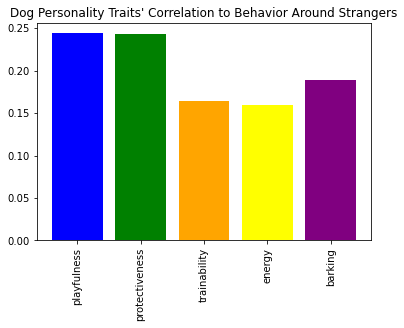

In [33]:
#Color list for coloring the bar graph
colors = ['blue', 'green', 'orange', 'yellow', 'purple']

#Bar graph that visualizes each of the importances
plt.figure()
plt.title("Dog Personality Traits' Correlation to Behavior Around Strangers")
plt.bar(range(dog_features.shape[1]),dog_importances, color=colors)
plt.xticks(range(dog_features.shape[1]), names, rotation=90)
plt.show

## Visualization Analysis
The main information we obtained from the visualization was that all of the feature variables had a decent amount of importance toward determining how a dog might behave around strangers. The lowest importance value which is 0.165 still signifies that energy had some relation to the good_with_strangers target variable. Playfulness and protectiveness obviously show the most correlation to that variable and should be considered the most when looking for a dog that is good with strangers. After seeing the visualization, we determined that trainability, energy, and barking should definitely be considered as well because they have values that are not too far off the variables with higher importance. 

## Results/Conclusion
Choosing a dog to bring home that will treat random people nicely can be a challenge, so knowing what to look for can pay off if done right. A dog that is good with strangers allows owners to relax when introducing their dog to new people and it can prevent incidents where dogs may act intimidating or violent. This analysis showed that playfulness and protectiveness are the traits to look out for the most because they had importance values that were relatively high compared to the others. Each of the lower-importance traits prove to have decent correlation to behavior around strangers according to the random forest model, so they definitely should also be considered. It would be a good idea for people who frequently have guests over or regularly take their dogs with them when leaving the house to pay close attention to the playfulness and protectiveness of their next prospective pet. This effort in the beginning can prevent pet troubles in the long run and lead to long, loving relationships between dogs and their owners.